In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [2]:
df = pd.read_csv('fake_job_postings.csv')
df.columns = df.columns.str.strip()
df = df[df['description'].notna()]
df['text'] = df['title'].fillna('') + " " + df['description'] + " " + df['requirements'].fillna('')

In [3]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [4]:
X = df['clean_text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [5]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3394
           1       1.00      0.35      0.52       182

    accuracy                           0.97      3576
   macro avg       0.98      0.68      0.75      3576
weighted avg       0.97      0.97      0.96      3576



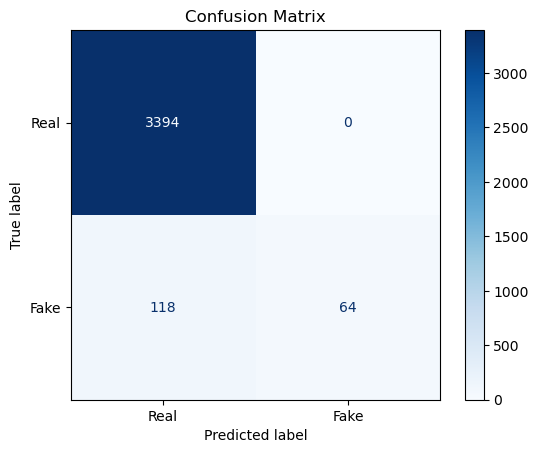

In [6]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

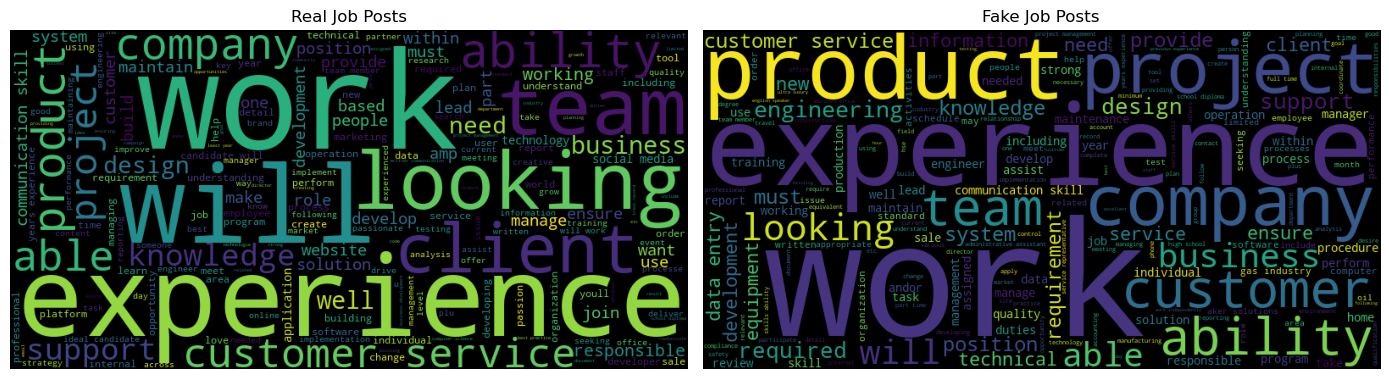

In [7]:
real_text = " ".join(df[df['fraudulent'] == 0]['clean_text'])
fake_text = " ".join(df[df['fraudulent'] == 1]['clean_text'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(real_text))
plt.title("Real Job Posts")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400).generate(fake_text))
plt.title("Fake Job Posts")
plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
import os
os.makedirs("models", exist_ok=True)

joblib.dump(model, 'models/job_fraud_model.pkl')
joblib.dump(tfidf, 'models/tfidf_vectorizer.pkl')


['models/tfidf_vectorizer.pkl']